In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os
import warnings
warnings.filterwarnings('ignore')

import sklearn # allows us to use all the library below!
from sklearn import neighbors # for knn
from sklearn import metrics # to allow us to do the classification report 
from sklearn.metrics import accuracy_score # to print out the accuracy
from sklearn import datasets # to import that dataset that sklearn has built in
from sklearn.model_selection import train_test_split # to train the MNIST dataset
from sklearn import svm # so we can so the support vector machine 
import matplotlib.pyplot as plt # so we plot the bar graph 
import numpy as np # used on the bar plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Used for the confusion matrix at the end
sklearn.__version__ # I am running 1.0.2 



import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC

Ideas -
Place another dataset that changes the image and color and test them side by side 
https://iq.opengenus.org/basics-of-machine-learning-image-classification-techniques/

['Banana', 'Cocos', 'Mandarine', 'Pineapple', 'Raspberry', 'Dates', 'Apple Red Delicious','Banana Red', 'Cactus fruit', 'Clementine', 'Granadilla']

Get it to print out photos! I feel like that would be the a nice touch for the presentation and stuff

# Grey Photos Appending

In [2]:
dim = 28
# This is my image preprocessing 
def fruitsGrey(data, data_type):
    list_of_images = []
    list_of_labels = []
    path = "../Code/fruits-360/" + data_type + "/"
    print('\n', data_type)
    for i,f in enumerate(data):
        p = path + f
        j=0
        for x in glob.glob(os.path.join(p, "*.jpg")):
            image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (dim, dim))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            list_of_images.append(image)
            list_of_labels.append(i)
            j+=1
        print(j , data_type.upper(), "images of" , data[i].upper())
    images = np.array(list_of_images)
    labels = np.array(list_of_labels)
    return list_of_images, list_of_labels

In [3]:
# The fruit I want to work with - anything over five is VERY slow
fruit_data = ['Mandarine', 'Cocos', 'Pineapple', 'Raspberry', 'Apple Red Delicious']

In [4]:
X_training, t_training = fruitsGrey(fruit_data, 'Training')
X_test, t_test = fruitsGrey(fruit_data, 'Test')


 Training
490 TRAINING images of MANDARINE
490 TRAINING images of COCOS
490 TRAINING images of PINEAPPLE
490 TRAINING images of RASPBERRY
490 TRAINING images of APPLE RED DELICIOUS

 Test
166 TEST images of MANDARINE
166 TEST images of COCOS
166 TEST images of PINEAPPLE
166 TEST images of RASPBERRY
166 TEST images of APPLE RED DELICIOUS


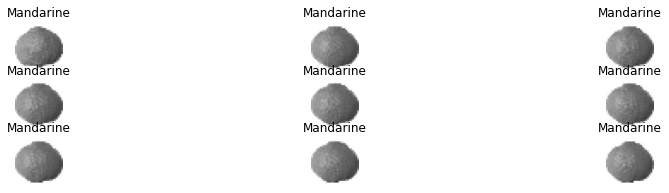

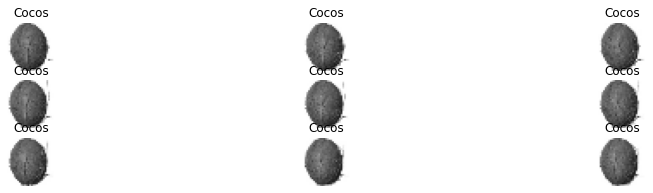

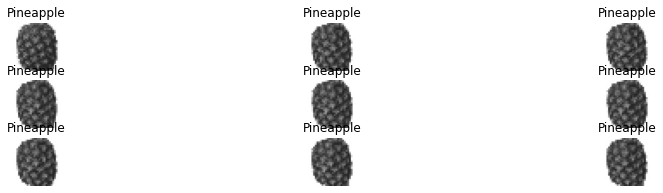

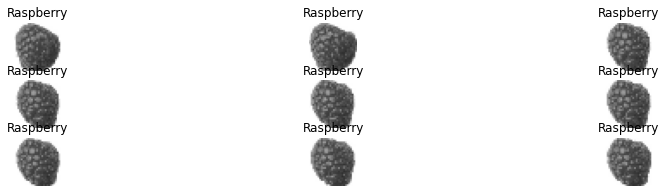

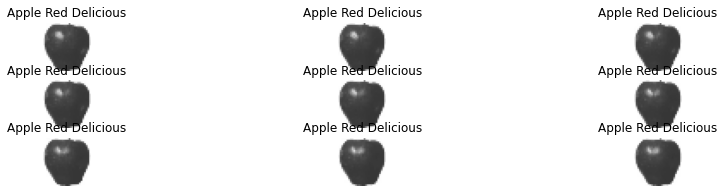

In [5]:
def plot_grey():
    a = 0
    x = 0 
    y = 9 
    while True:
        if a >= 2450:
            break
        assert len(X_training[x:y]) == 3*3
        fig, axs = plt.subplots(3, 3, figsize=(15,3))

        n = 0
        for i in range(0, 3):
            for j in range(0, 3):
                axs[i, j].axis('off')
                axs[i, j].imshow(X_training[x:y][n])
                axs[i, j].set_title(fruit_data[t_training[a]])
                n += 1 
        # so it goes to the next set 
        a += 490
        x += 490
        y += 490
plot_grey()

In [6]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_training= scaler.fit_transform([i.flatten() for i in X_training])
X_test= scaler.fit_transform([i.flatten() for i in X_test])

# Support Vector Machine

In [7]:
svm = SVC()
svm.fit(X_training, t_training) 
predicted_svm = svm.predict(X_test)

In [8]:
train_score_svm = svm.score(X_training, t_training)
test_score_svm = svm.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_svm, test_score_svm))
print("\nClassification report for classifier %s:\n%s\n" % (svm, metrics.classification_report(t_test, predicted_svm, target_names=fruit_data)))

Train Accuracy: 1.0, Test Accuracy: 0.9710843373493976

Classification report for classifier SVC():
                     precision    recall  f1-score   support

          Mandarine       1.00      0.99      1.00       166
              Cocos       1.00      0.92      0.96       166
          Pineapple       0.98      0.99      0.99       166
          Raspberry       0.89      1.00      0.94       166
Apple Red Delicious       1.00      0.95      0.97       166

           accuracy                           0.97       830
          macro avg       0.97      0.97      0.97       830
       weighted avg       0.97      0.97      0.97       830




# Multilayer Perceptron

In [9]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, max_iter=350)
mlp.fit(X_training, t_training)
predicted_mlp = mlp.predict(X_test)

In [10]:
train_score_mlp = mlp.score(X_training, t_training)
test_score_mlp = mlp.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_mlp, test_score_mlp))
print("\nClassification report for classifier %s:\n%s\n" % (mlp, metrics.classification_report(t_test, predicted_mlp, target_names=fruit_data)))

Train Accuracy: 1.0, Test Accuracy: 0.9602409638554217

Classification report for classifier MLPClassifier(max_iter=350, random_state=1):
                     precision    recall  f1-score   support

          Mandarine       0.98      1.00      0.99       166
              Cocos       0.94      0.90      0.92       166
          Pineapple       0.99      0.98      0.98       166
          Raspberry       0.91      0.93      0.92       166
Apple Red Delicious       0.98      0.99      0.99       166

           accuracy                           0.96       830
          macro avg       0.96      0.96      0.96       830
       weighted avg       0.96      0.96      0.96       830




# Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_training, t_training)
predicted_dt = dt.predict(X_test)

In [12]:
train_score_dt = dt.score(X_training, t_training)
test_score_dt = dt.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_dt, test_score_dt))
print("\nClassification report for classifier %s:\n%s\n" % (dt, metrics.classification_report(t_test, predicted_dt, target_names=fruit_data)))

Train Accuracy: 1.0, Test Accuracy: 0.8385542168674699

Classification report for classifier DecisionTreeClassifier():
                     precision    recall  f1-score   support

          Mandarine       0.99      0.92      0.96       166
              Cocos       0.87      0.80      0.83       166
          Pineapple       0.72      0.78      0.75       166
          Raspberry       0.75      0.95      0.84       166
Apple Red Delicious       0.93      0.75      0.83       166

           accuracy                           0.84       830
          macro avg       0.85      0.84      0.84       830
       weighted avg       0.85      0.84      0.84       830




# Naïve Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_training, t_training)
predicted_nb = nb.predict(X_test)

In [14]:
train_score_nb = nb.score(X_training, t_training)
test_score_nb = nb.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_nb, test_score_nb))
print("\nClassification report for classifier %s:\n%s\n" % (nb, metrics.classification_report(t_test, predicted_nb, target_names=fruit_data)))

Train Accuracy: 0.9453061224489796, Test Accuracy: 0.20120481927710843

Classification report for classifier GaussianNB():
                     precision    recall  f1-score   support

          Mandarine       0.00      0.00      0.00       166
              Cocos       1.00      0.01      0.01       166
          Pineapple       0.00      0.00      0.00       166
          Raspberry       0.20      1.00      0.33       166
Apple Red Delicious       0.00      0.00      0.00       166

           accuracy                           0.20       830
          macro avg       0.24      0.20      0.07       830
       weighted avg       0.24      0.20      0.07       830




# K-Nearest Neighbor

In [15]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_training, t_training)
predicted_knn = knn.predict(X_test)

In [16]:
train_score_knn = knn.score(X_training, t_training)
test_score_knn = knn.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_knn, test_score_knn))
print("\nClassification report for classifier %s:\n%s\n" % (knn, metrics.classification_report(t_test, predicted_knn, target_names=fruit_data)))

Train Accuracy: 1.0, Test Accuracy: 0.9554216867469879

Classification report for classifier KNeighborsClassifier():
                     precision    recall  f1-score   support

          Mandarine       1.00      1.00      1.00       166
              Cocos       0.88      0.92      0.90       166
          Pineapple       1.00      0.94      0.97       166
          Raspberry       0.91      0.92      0.91       166
Apple Red Delicious       1.00      0.99      1.00       166

           accuracy                           0.96       830
          macro avg       0.96      0.96      0.96       830
       weighted avg       0.96      0.96      0.96       830




# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=9)  # 9 trees as the figure
rf.fit(X_training, t_training)
predicted_rf = rf.predict(X_test)

In [18]:
train_score_rf = rf.score(X_training, t_training)
test_score_rf = rf.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_rf, test_score_rf))
print("\nClassification report for classifier %s:\n%s\n" % (rf, metrics.classification_report(t_test, predicted_rf, target_names=fruit_data)))

Train Accuracy: 1.0, Test Accuracy: 0.946987951807229

Classification report for classifier RandomForestClassifier(n_estimators=9):
                     precision    recall  f1-score   support

          Mandarine       0.99      1.00      0.99       166
              Cocos       0.90      0.91      0.91       166
          Pineapple       0.97      0.91      0.94       166
          Raspberry       0.87      0.92      0.89       166
Apple Red Delicious       1.00      1.00      1.00       166

           accuracy                           0.95       830
          macro avg       0.95      0.95      0.95       830
       weighted avg       0.95      0.95      0.95       830




# Accuracy graph

In [19]:
def addlabelsTrain(x,y):
    for i in range(len(x)):
        plt.text(i- 0.2, y[i], y[i])

In [20]:
def addlabelsTest(x,y):
    for i in range(len(x)):
        plt.text(i+ 0.1, y[i], y[i])

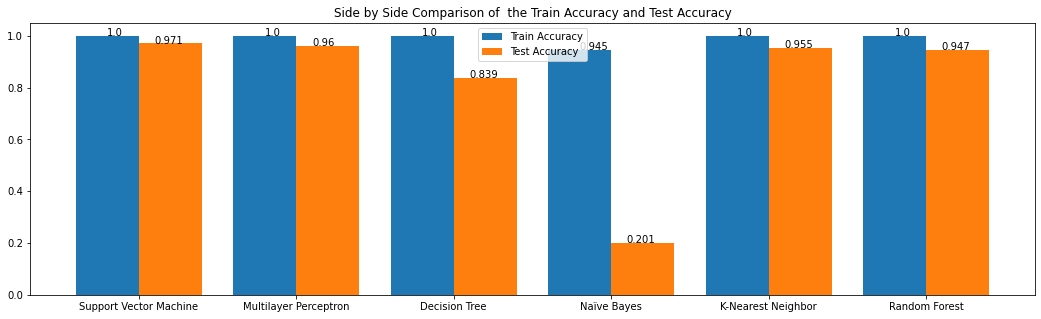

In [21]:
models = [svm, mlp, dt, nb, knn, rf] # To pass in the models that was created in each section

# This is to create a better visual name for each
names = ["Support Vector Machine", "Multilayer Perceptron", "Decision Tree", "Naïve Bayes", "K-Nearest Neighbor", "Random Forest"]

# Saving each of the train_scores and test_scores created in each 
train_accs = [train_score_svm, train_score_mlp, train_score_dt, train_score_nb, train_score_knn, train_score_rf]
test_accs = [test_score_svm, test_score_mlp, test_score_dt, test_score_nb, test_score_knn, test_score_rf]

# Arranging the names of the bar graph
X_axis_test = np.arange(len(names))

# Increasing the size, otherwise the x-axis is unreadable 
f, ax = plt.subplots(figsize=(18,5))
ax.set_title('Side by Side Comparison of  the Train Accuracy and Test Accuracy')

# rounding the numbers because otherwise it is unreadable
for i in range(len(train_accs)):
    train_accs[i] = round(train_accs[i], 3)
    
for i in range(len(test_accs)):
    test_accs[i] = round(test_accs[i], 3)

plt.bar(X_axis_test - 0.2, train_accs, 0.4, label = 'Train Accuracy',)
addlabelsTrain(X_axis_test - 0.2, train_accs)


plt.bar(X_axis_test + 0.2, test_accs, 0.4, label = 'Test Accuracy')
addlabelsTest(X_axis_test + 0.2, test_accs)

  
plt.xticks(X_axis_test, names)
plt.legend()
plt.show()

# Confusion Matrix

###### 

# Binary Code

In [22]:
dim = 28
# This is my image preprocessing 
def fruitsBinary(data, data_type):
    list_of_images = []
    list_of_labels = []
    path = "../Code/fruits-360/" + data_type + "/"
    print('\n', data_type)
    for i,f in enumerate(data):
        p = path + f
        j=0
        for x in glob.glob(os.path.join(p, "*.jpg")):
            image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (dim, dim))
            image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            list_of_images.append(image)
            list_of_labels.append(i)
            j+=1
        print(j , data_type.upper(), "images of" , data[i].upper())
    images = np.array(list_of_images)
    labels = np.array(list_of_labels)
    return list_of_images, list_of_labels

In [23]:
fruit_data = ['Mandarine', 'Cocos', 'Pineapple', 'Raspberry', 'Apple Red Delicious']
X_training_binary, t_training_binary = fruitsBinary(fruit_data, 'Training')
X_test_binary, t_test_binary = fruitsBinary(fruit_data, 'Test')


 Training
490 TRAINING images of MANDARINE
490 TRAINING images of COCOS
490 TRAINING images of PINEAPPLE
490 TRAINING images of RASPBERRY
490 TRAINING images of APPLE RED DELICIOUS

 Test
166 TEST images of MANDARINE
166 TEST images of COCOS
166 TEST images of PINEAPPLE
166 TEST images of RASPBERRY
166 TEST images of APPLE RED DELICIOUS


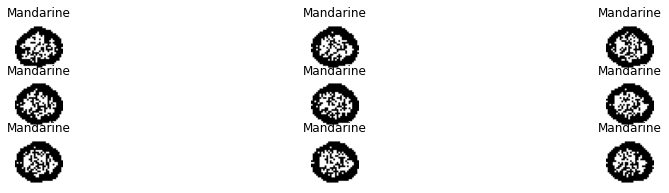

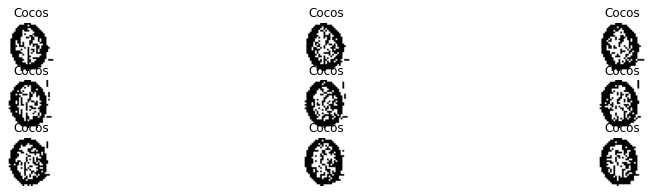

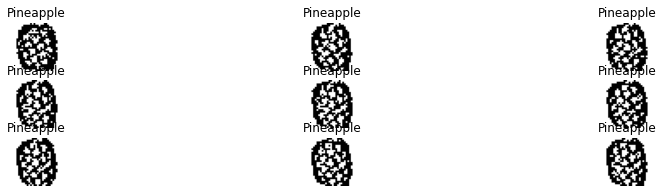

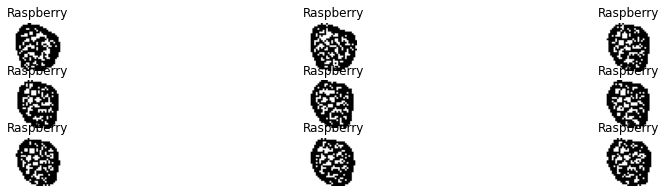

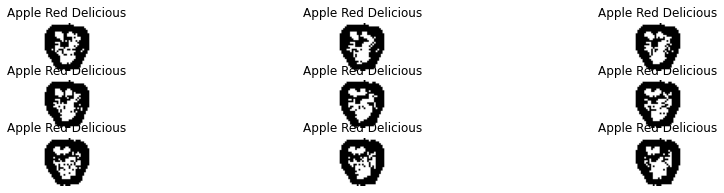

In [26]:
def plot_binary():
    a = 0
    x = 0 
    y = 9 
    while True:
        if a >= 2450:
            break
        assert len(X_training_binary[x:y]) == 3*3
        fig, axs = plt.subplots(3, 3, figsize=(15,3))

        n = 0
        
        for i in range(0, 3):
            for j in range(0, 3):
                axs[i, j].axis('off')
                axs[i, j].imshow(X_training_binary[x:y][n])
                axs[i, j].set_title(fruit_data[t_training_binary[a]])
                n += 1 
        # so it goes to the next set 
        a += 490
        x += 490
        y += 490
plot_binary()

In [27]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_training_binary= scaler.fit_transform([i.flatten() for i in X_training_binary])
X_test_binary= scaler.fit_transform([i.flatten() for i in X_test_binary])

# Support Vector Machine

In [28]:
svm_binary = SVC()
svm_binary.fit(X_training_binary, t_training_binary) 
predicted_svm_binary = svm_binary.predict(X_test_binary)

In [29]:
train_score_svm_binary = svm_binary.score(X_training_binary, t_training_binary)
test_score_svm_binary = svm_binary.score(X_test_binary, t_test_binary)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_svm_binary, test_score_svm_binary))
print("\nClassification report for classifier %s:\n%s\n" % (svm_binary, metrics.classification_report(t_test_binary, predicted_svm_binary, target_names=fruit_data)))

Train Accuracy: 0.9995918367346939, Test Accuracy: 0.9168674698795181

Classification report for classifier SVC():
                     precision    recall  f1-score   support

          Mandarine       0.99      0.87      0.93       166
              Cocos       0.88      0.93      0.90       166
          Pineapple       0.83      0.97      0.89       166
          Raspberry       0.93      0.86      0.89       166
Apple Red Delicious       0.98      0.96      0.97       166

           accuracy                           0.92       830
          macro avg       0.92      0.92      0.92       830
       weighted avg       0.92      0.92      0.92       830




# Multilayer Perceptron

In [54]:
from sklearn.neural_network import MLPClassifier

mlp_binary = MLPClassifier(random_state=1, max_iter=350)
mlp_binary.fit(X_training_binary, t_training_binary)
predicted_mlp_binary= mlp_binary.predict(X_test_binary)

In [55]:
train_score_mlp_binary = mlp.score(X_training_binary, t_training_binary)
test_score_mlp_binary = mlp.score(X_test_binary, t_test_binary)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_mlp_binary, test_score_mlp_binary))
print("\nClassification report for classifier %s:\n%s\n" % (mlp_binary, metrics.classification_report(t_test_binary, predicted_mlp_binary, target_names=fruit_data)))

Train Accuracy: 0.8261224489795919, Test Accuracy: 0.7506024096385542

Classification report for classifier MLPClassifier(max_iter=350, random_state=1):
                     precision    recall  f1-score   support

          Mandarine       0.94      0.78      0.85       166
              Cocos       0.81      0.91      0.86       166
          Pineapple       0.87      0.95      0.91       166
          Raspberry       0.92      0.89      0.90       166
Apple Red Delicious       0.95      0.95      0.95       166

           accuracy                           0.89       830
          macro avg       0.90      0.89      0.89       830
       weighted avg       0.90      0.89      0.89       830




# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt_binary = DecisionTreeClassifier()
dt_binary.fit(X_training_binary, t_training_binary)
predicted_dt_binary = dt_binary.predict(X_test_binary)

In [53]:
train_score_dt_binary = dt_binary.score(X_training_binary, t_training_binary)
test_score_dt_binary = dt_binary.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_dt_binary, test_score_dt_binary))
print("\nClassification report for classifier %s:\n%s\n" % (dt_binary, metrics.classification_report(t_test_binary, predicted_dt_binary, target_names=fruit_data)))

Train Accuracy: 1.0, Test Accuracy: 0.6819277108433734

Classification report for classifier DecisionTreeClassifier():
                     precision    recall  f1-score   support

          Mandarine       0.89      0.61      0.73       166
              Cocos       0.69      0.81      0.74       166
          Pineapple       0.79      0.83      0.81       166
          Raspberry       0.68      0.58      0.62       166
Apple Red Delicious       0.80      0.98      0.88       166

           accuracy                           0.76       830
          macro avg       0.77      0.76      0.76       830
       weighted avg       0.77      0.76      0.76       830




# Naïve Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

nb_binary = GaussianNB()
nb_binary.fit(X_training_binary, t_training_binary)
predicted_nb_binary = nb_binary.predict(X_test_binary)

In [51]:
train_score_nb_binary = nb.score(X_training_binary, t_training_binary)
test_score_nb_binary = nb.score(X_test_binary, t_test_binary)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_nb_binary, test_score_nb_binary))
print("\nClassification report for classifier %s:\n%s\n" % (nb_binary, metrics.classification_report(t_test_binary, predicted_nb_binary, target_names=fruit_data)))

Train Accuracy: 0.20408163265306123, Test Accuracy: 0.2

Classification report for classifier GaussianNB():
                     precision    recall  f1-score   support

          Mandarine       0.00      0.00      0.00       166
              Cocos       0.30      0.02      0.03       166
          Pineapple       0.97      0.47      0.63       166
          Raspberry       0.21      0.93      0.34       166
Apple Red Delicious       0.00      0.00      0.00       166

           accuracy                           0.28       830
          macro avg       0.30      0.28      0.20       830
       weighted avg       0.30      0.28      0.20       830




# K-Nearest Neighbor

In [40]:
knn_binary = neighbors.KNeighborsClassifier()
knn_binary.fit(X_training_binary, t_training_binary)
predicted_knn_binary = knn.predict(X_test_binary)

In [41]:
train_score_knn_binary = knn.score(X_training_binary, t_training_binary)
test_score_knn_binary = knn.score(X_test_binary, t_test_binary)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_knn_binary, test_score_knn_binary))
print("\nClassification report for classifier %s:\n%s\n" % (knn_binary, metrics.classification_report(t_test_binary, predicted_knn_binary, target_names=fruit_data)))

Train Accuracy: 0.8824489795918368, Test Accuracy: 0.7397590361445783

Classification report for classifier KNeighborsClassifier():
                     precision    recall  f1-score   support

          Mandarine       1.00      0.46      0.63       166
              Cocos       0.49      0.93      0.64       166
          Pineapple       0.99      0.57      0.73       166
          Raspberry       0.76      0.90      0.83       166
Apple Red Delicious       0.94      0.84      0.89       166

           accuracy                           0.74       830
          macro avg       0.84      0.74      0.74       830
       weighted avg       0.84      0.74      0.74       830




# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_binary = RandomForestClassifier(n_estimators=9)  # 9 trees as the figure
rf_binary.fit(X_training_binary, t_training_binary)
predicted_rf_binary = rf_binary.predict(X_test_binary)

In [49]:
train_score_rf_binary = rf.score(X_training_binary, t_training_binary)
test_score_rf_binary = rf.score(X_test_binary, t_test_binary)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_rf_binary, test_score_rf_binary))
print("\nClassification report for classifier %s:\n%s\n" % (rf_binary, metrics.classification_report(t_test_binary, predicted_rf_binary, target_names=fruit_data)))

Train Accuracy: 0.4489795918367347, Test Accuracy: 0.372289156626506

Classification report for classifier RandomForestClassifier(n_estimators=9):
                     precision    recall  f1-score   support

          Mandarine       0.94      0.70      0.80       166
              Cocos       0.80      0.92      0.85       166
          Pineapple       0.87      0.93      0.90       166
          Raspberry       0.84      0.67      0.74       166
Apple Red Delicious       0.76      0.94      0.84       166

           accuracy                           0.83       830
          macro avg       0.84      0.83      0.83       830
       weighted avg       0.84      0.83      0.83       830




# Binary Graphs

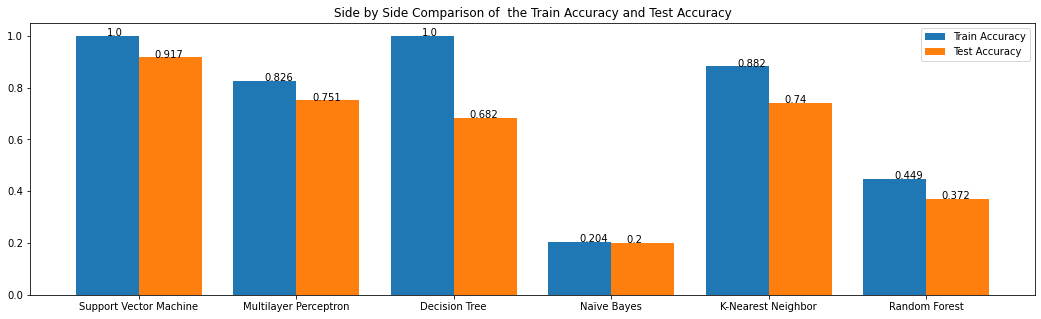

In [56]:
models = [svm_binary, mlp_binary, dt_binary, nb_binary, knn_binary, rf_binary] # To pass in the models that was created in each section

# This is to create a better visual name for each
names = ["Support Vector Machine", "Multilayer Perceptron", "Decision Tree", "Naïve Bayes", "K-Nearest Neighbor", "Random Forest"]

# Saving each of the train_scores and test_scores created in each 
train_accs = [train_score_svm_binary, train_score_mlp_binary, train_score_dt_binary, \
              train_score_nb_binary, train_score_knn_binary, train_score_rf_binary]
test_accs = [test_score_svm_binary, test_score_mlp_binary, test_score_dt_binary, \
             test_score_nb_binary, test_score_knn_binary, test_score_rf_binary]

# Arranging the names of the bar graph
X_axis_test = np.arange(len(names))

# Increasing the size, otherwise the x-axis is unreadable 
f, ax = plt.subplots(figsize=(18,5))
ax.set_title('Side by Side Comparison of  the Train Accuracy and Test Accuracy')

# rounding the numbers because otherwise it is unreadable
for i in range(len(train_accs)):
    train_accs[i] = round(train_accs[i], 3)
    
for i in range(len(test_accs)):
    test_accs[i] = round(test_accs[i], 3)

plt.bar(X_axis_test - 0.2, train_accs, 0.4, label = 'Train Accuracy',)
addlabelsTrain(X_axis_test - 0.2, train_accs)


plt.bar(X_axis_test + 0.2, test_accs, 0.4, label = 'Test Accuracy')
addlabelsTest(X_axis_test + 0.2, test_accs)

  
plt.xticks(X_axis_test, names)
plt.legend()
plt.show()